# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import math

2023-08-10 22:54:52.067193: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 22:54:52.302708: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 22:54:52.305034: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 22:54:54.153554: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Reading the Dataset

In [2]:
data = pd.read_csv('jena_climate_2009_2016.csv')

In [3]:
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
data.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [5]:
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [6]:
data = data[5::6]

In [7]:
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [8]:
data.reset_index(inplace = True)

In [9]:
data.drop("index", axis = 1)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70086,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
70087,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
70088,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
70089,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [10]:
data.index = pd.to_datetime(data['Date Time'], format = "%d.%m.%Y %H:%M:%S")

In [11]:
data

,index,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,,
2009-01-01 01:00:00,5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


In [12]:
data.drop(["Date Time"], axis = 1, inplace = True)

/tmp/ipykernel_28409/531472494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["Date Time"], axis = 1, inplace = True)


In [13]:
data

,index,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,11,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,17,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,23,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,29,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


In [14]:
data.drop(["index"], axis = 1, inplace = True)

/tmp/ipykernel_28409/540597820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["index"], axis = 1, inplace = True)


In [15]:
data

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


In [16]:
temp = data['T (degC)']
temp

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
                       ... 
2016-12-31 19:10:00   -0.98
2016-12-31 20:10:00   -1.40
2016-12-31 21:10:00   -2.75
2016-12-31 22:10:00   -2.89
2016-12-31 23:10:00   -3.93
Name: T (degC), Length: 70091, dtype: float64

<Axes: xlabel='Date Time'>

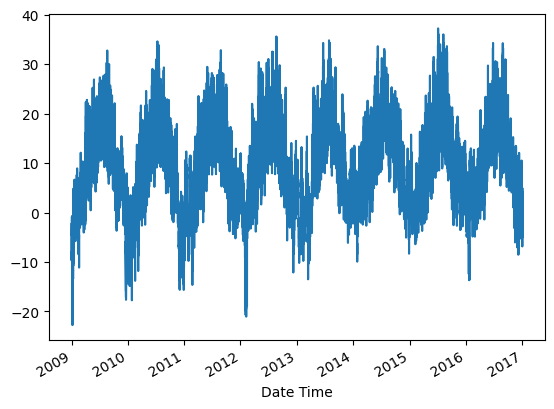

In [17]:
temp.plot()

In [18]:
# [[[1], [2], [3], [4], [5]]] ==> [6]
# [[[2], [3], [4], [5], [6]]] ==> [7]
# [[[3], [4], [5], [6], [7]]] ==> [8]

In [19]:
def data_to_x_y(data, window_size = 5):
    df = data.to_numpy()
    x = []
    y = []
    for i in range(len(df) - window_size):
        row = [[a] for a in df[i : i + 5]]
        x.append(row)
        label = df[i + 5]
        y.append(label)
    return np.array(x), np.array(y)

In [20]:
x, y = data_to_x_y(temp, 5)
x.shape, y.shape
x_train, y_train = x[:60000], y[:60000]

In [21]:
# x

In [22]:
# y

# Splitting the data

In [23]:
x_train, y_train = x[ : 60000], y[ : 60000]
x_val, y_val = x[60000 : 65000], y[60000 : 65000]
x_test, y_test = x[65000 : ], y[65000 : ]
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(60000, 5, 1) (60000,)
(5000, 5, 1) (5000,)
(5086, 5, 1) (5086,)


In [24]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

In [25]:
model = Sequential()

model.add(InputLayer((5, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))
model.summary()

2023-08-10 22:54:59.006508: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-10 22:54:59.007275: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
cb = ModelCheckpoint("model", save_best_only = True)
model.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate=0.0001), metrics = [RootMeanSquaredError()])

In [27]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 10, callbacks = [cb])

Epoch 1/10
1867/1875 [============================>.] - ETA: 0s - loss: 39.5519 - root_mean_squared_error: 6.2890INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 15s 7ms/step - loss: 39.4018 - root_mean_squared_error: 6.2771 - val_loss: 1.2381 - val_root_mean_squared_error: 1.1127
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 2.3115 - root_mean_squared_error: 1.5204INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 2.3108 - root_mean_squared_error: 1.5201 - val_loss: 0.6369 - val_root_mean_squared_error: 0.7981
Epoch 3/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.9817 - root_mean_squared_error: 0.9908INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.9826 - root_mean_squared_error: 0.9912 - val_loss: 0.5516 - val_root_mean_squared_error: 0.7427
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7542 - root_mean_squared_error: 0.8685 - val_loss: 0.5834 - val_root_mean_squared_error: 0.7638
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6909 - root_mean_squared_error: 0.8312INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.6910 - root_mean_squared_error: 0.8313 - val_loss: 0.5153 - val_root_mean_squared_error: 0.7178
Epoch 6/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6694 - root_mean_squared_error: 0.8182INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6697 - root_mean_squared_error: 0.8183 - val_loss: 0.5001 - val_root_mean_squared_error: 0.7072
Epoch 7/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.6588 - root_mean_squared_error: 0.8116INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6587 - root_mean_squared_error: 0.8116 - val_loss: 0.4925 - val_root_mean_squared_error: 0.7018
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6527 - root_mean_squared_error: 0.8079 - val_loss: 0.5116 - val_root_mean_squared_error: 0.7153
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.6483 - root_mean_squared_error: 0.8051 - val_loss: 0.5124 - val_root_mean_squared_error: 0.7158
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6450 - root_mean_squared_error: 0.8031 - val_loss: 0.5012 - val_root_mean_squared_error: 0.7080


In [28]:
from keras.models import load_model
model = load_model("model")

In [29]:
train_predictions = model.predict(x_train).flatten()
train_results = pd.DataFrame(data = {"Train Predictions" : train_predictions, "Actual" : y_train})

1875/1875 [==============================] - 5s 3ms/step


<Axes: >

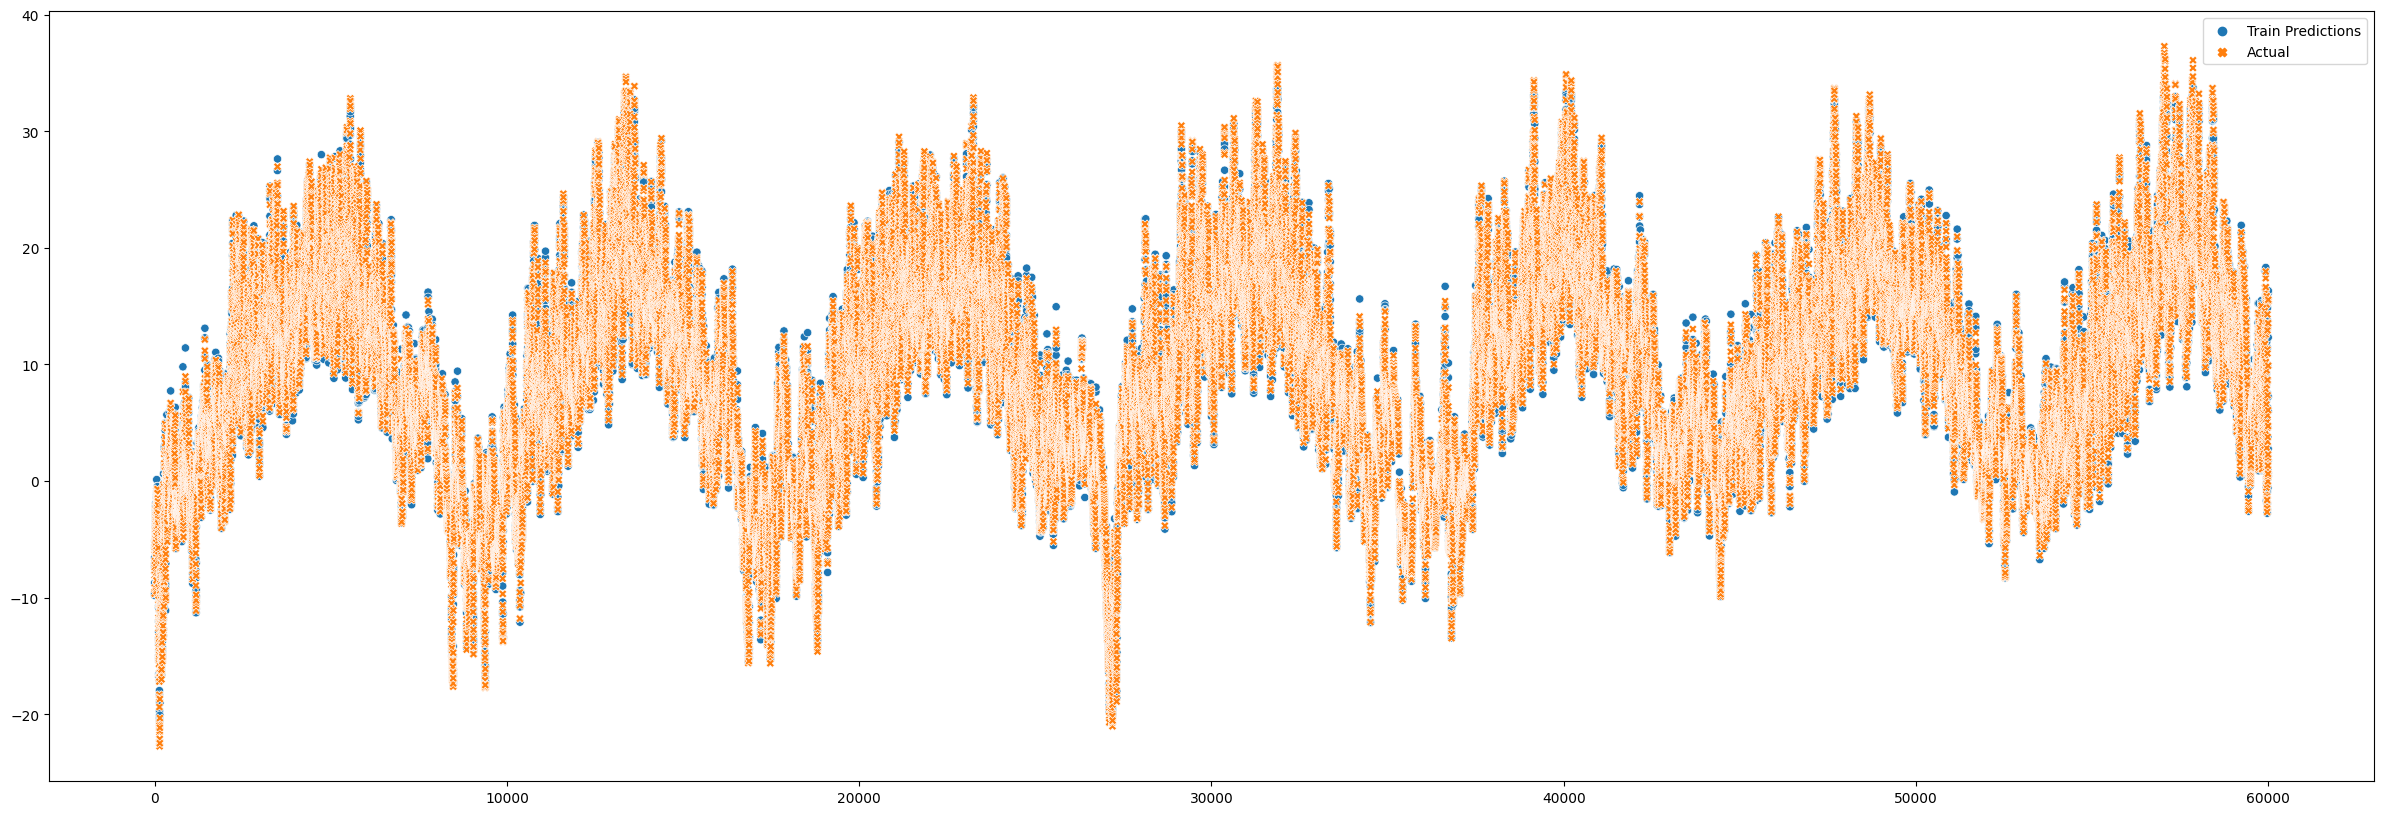

In [30]:
plt.figure(figsize=(30, 10))
sns.scatterplot(data = train_results)

159/159 [==============================] - 1s 2ms/step


<Axes: >

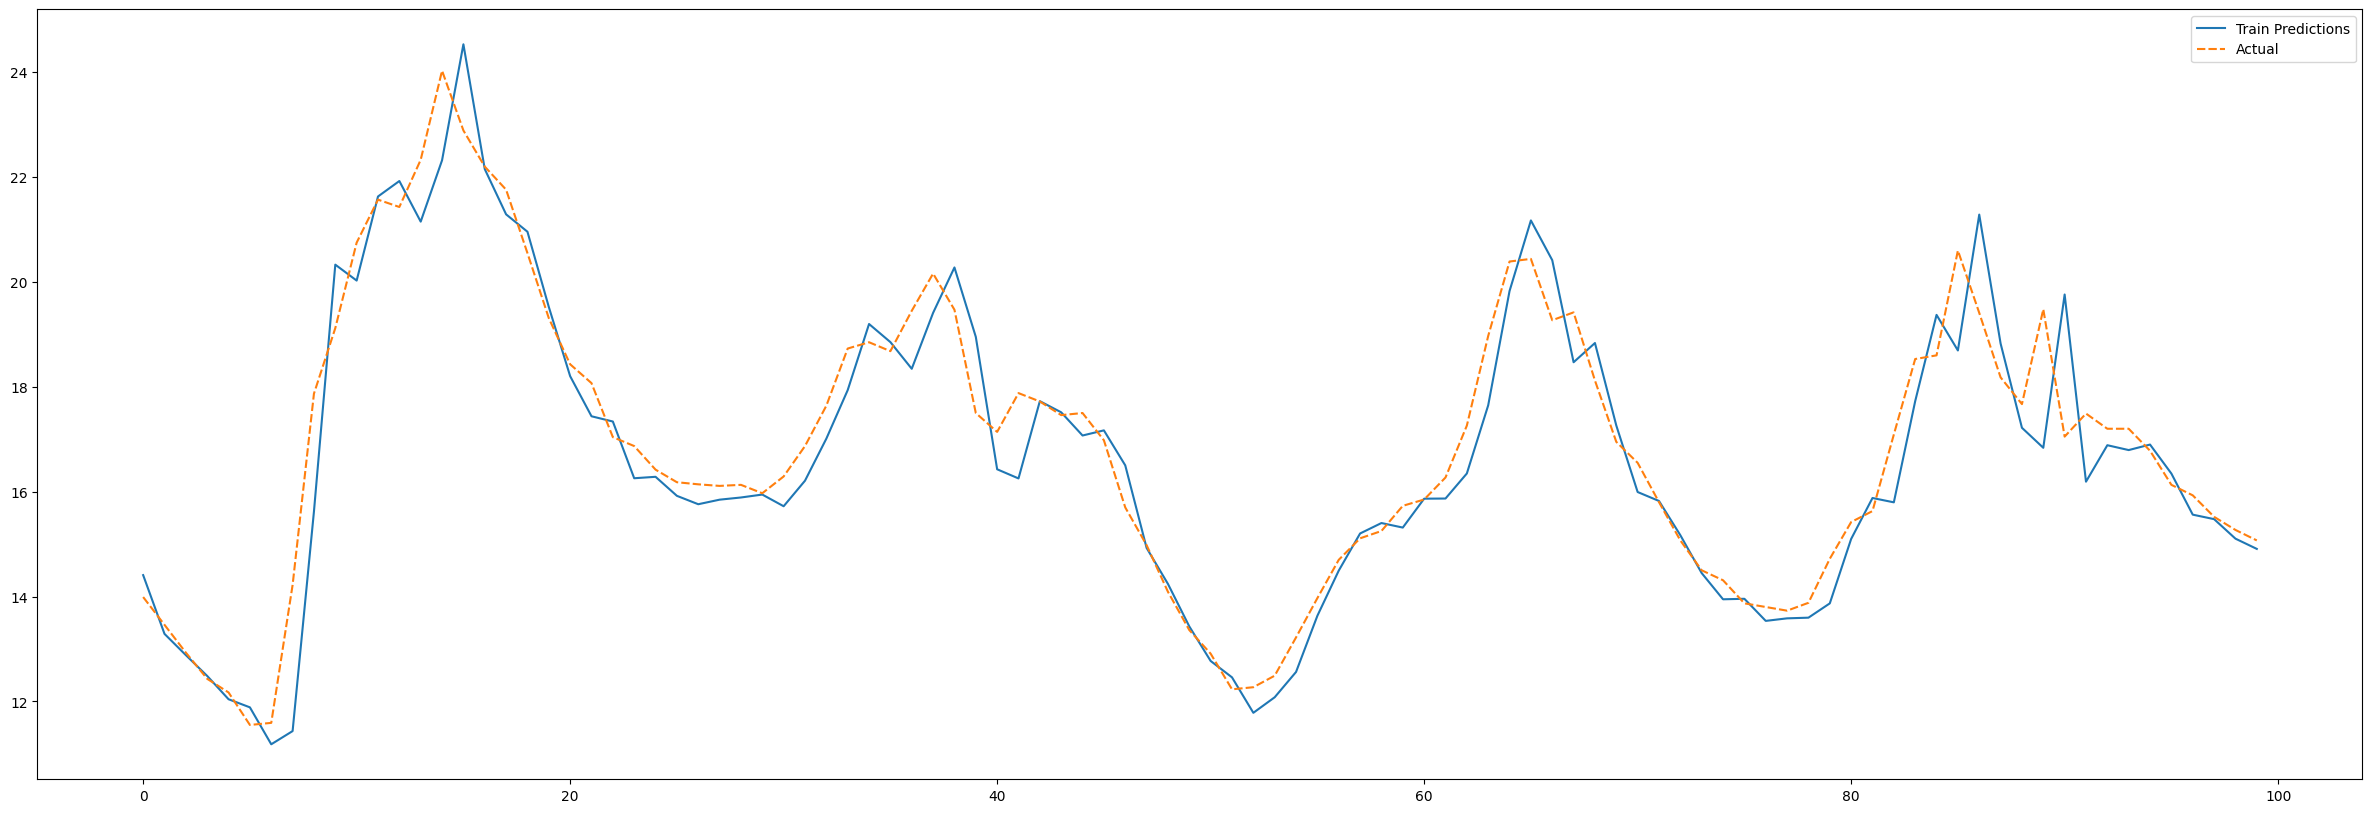

In [31]:
test_predictions = model.predict(x_test).flatten()
test_results = pd.DataFrame(data = {"Train Predictions" : test_predictions, "Actual" : y_test})
plt.figure(figsize=(30, 10))
sns.lineplot(data = test_results[:100])

In [32]:
from sklearn.metrics import mean_squared_error as mse
def plotPredictions(model, x, y, start = 0, end = 100):
    pred = model.predict(x).flatten()
    df = pd.DataFrame(data = {"Predictions" : pred, "Actuals" : y})
    sns.lineplot(data = df[start : end])
    return df, mse(y, pred)

159/159 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       14.408337    13.99
 1       13.287605    13.46
 2       12.881804    12.93
 3       12.484873    12.43
 4       12.040545    12.17
 ...           ...      ...
 5081    -1.118061    -0.98
 5082    -1.323896    -1.40
 5083    -1.643148    -2.75
 5084    -3.196376    -2.89
 5085    -3.070633    -3.93
 
 [5086 rows x 2 columns],
 0.645040310101371)

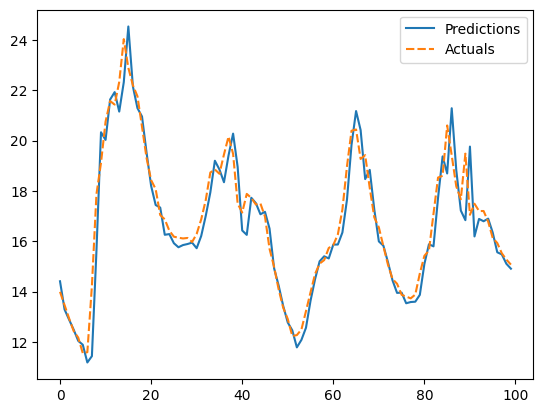

In [33]:
plotPredictions(model, x_test, y_test)

In [34]:
model2 = Sequential()

model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size = 5))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             384       
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 913 (3.57 KB)
Trainable params: 913 (3.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
cb2 = ModelCheckpoint("model2", save_best_only = True)
model2.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate=0.0001), metrics = [RootMeanSquaredError()])
model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 10, callbacks = [cb2])

Epoch 1/10
1869/1875 [============================>.] - ETA: 0s - loss: 14.5586 - root_mean_squared_error: 3.8156INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 14.5205 - root_mean_squared_error: 3.8106 - val_loss: 1.8651 - val_root_mean_squared_error: 1.3657
Epoch 2/10
1853/1875 [============================>.] - ETA: 0s - loss: 1.6470 - root_mean_squared_error: 1.2834INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 1.6405 - root_mean_squared_error: 1.2808 - val_loss: 0.7874 - val_root_mean_squared_error: 0.8873
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.9710 - root_mean_squared_error: 0.9854INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.9710 - root_mean_squared_error: 0.9854 - val_loss: 0.6799 - val_root_mean_squared_error: 0.8246
Epoch 4/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.8246 - root_mean_squared_error: 0.9081INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.8240 - root_mean_squared_error: 0.9077 - val_loss: 0.5774 - val_root_mean_squared_error: 0.7598
Epoch 5/10
1854/1875 [============================>.] - ETA: 0s - loss: 0.7412 - root_mean_squared_error: 0.8609INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7416 - root_mean_squared_error: 0.8612 - val_loss: 0.5279 - val_root_mean_squared_error: 0.7266
Epoch 6/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.7004 - root_mean_squared_error: 0.8369INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7007 - root_mean_squared_error: 0.8371 - val_loss: 0.5165 - val_root_mean_squared_error: 0.7187
Epoch 7/10
1855/1875 [============================>.] - ETA: 0s - loss: 0.6813 - root_mean_squared_error: 0.8254INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6818 - root_mean_squared_error: 0.8257 - val_loss: 0.5036 - val_root_mean_squared_error: 0.7096
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6737 - root_mean_squared_error: 0.8208 - val_loss: 0.5125 - val_root_mean_squared_error: 0.7159
Epoch 9/10
1859/1875 [============================>.] - ETA: 0s - loss: 0.6672 - root_mean_squared_error: 0.8168INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6673 - root_mean_squared_error: 0.8169 - val_loss: 0.4934 - val_root_mean_squared_error: 0.7024
Epoch 10/10
1838/1875 [============================>.] - ETA: 0s - loss: 0.6620 - root_mean_squared_error: 0.8136INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6620 - root_mean_squared_error: 0.8137 - val_loss: 0.4932 - val_root_mean_squared_error: 0.7023


In [36]:
model3 = Sequential()

model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Flatten())
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
cb3 = ModelCheckpoint("model3", save_best_only = True)
model3.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate=0.0001), metrics = [RootMeanSquaredError()])
model3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 10, callbacks = [cb3])

Epoch 1/10
1859/1875 [============================>.] - ETA: 0s - loss: 51.3258 - root_mean_squared_error: 7.1642INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 11s 5ms/step - loss: 50.9671 - root_mean_squared_error: 7.1391 - val_loss: 2.0780 - val_root_mean_squared_error: 1.4415
Epoch 2/10
1872/1875 [============================>.] - ETA: 0s - loss: 4.2505 - root_mean_squared_error: 2.0617INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 8s 4ms/step - loss: 4.2476 - root_mean_squared_error: 2.0610 - val_loss: 0.7153 - val_root_mean_squared_error: 0.8457
Epoch 3/10
1865/1875 [============================>.] - ETA: 0s - loss: 1.2817 - root_mean_squared_error: 1.1321INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 1.2777 - root_mean_squared_error: 1.1304 - val_loss: 0.5506 - val_root_mean_squared_error: 0.7420
Epoch 4/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.7999 - root_mean_squared_error: 0.8944INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.7988 - root_mean_squared_error: 0.8937 - val_loss: 0.5140 - val_root_mean_squared_error: 0.7169
Epoch 5/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.6906 - root_mean_squared_error: 0.8310INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6903 - root_mean_squared_error: 0.8308 - val_loss: 0.4958 - val_root_mean_squared_error: 0.7041
Epoch 6/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6608 - root_mean_squared_error: 0.8129INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6615 - root_mean_squared_error: 0.8133 - val_loss: 0.4910 - val_root_mean_squared_error: 0.7007
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6515 - root_mean_squared_error: 0.8071 - val_loss: 0.4946 - val_root_mean_squared_error: 0.7033
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6461 - root_mean_squared_error: 0.8038 - val_loss: 0.4983 - val_root_mean_squared_error: 0.7059
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6428 - root_mean_squared_error: 0.8018 - val_loss: 0.4990 - val_root_mean_squared_error: 0.7064
Epoch 10/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6408 - root_mean_squared_error: 0.8005INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6405 - root_mean_squared_error: 0.8003 - val_loss: 0.4866 - val_root_mean_squared_error: 0.6976


In [38]:
temp

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
                       ... 
2016-12-31 19:10:00   -0.98
2016-12-31 20:10:00   -1.40
2016-12-31 21:10:00   -2.75
2016-12-31 22:10:00   -2.89
2016-12-31 23:10:00   -3.93
Name: T (degC), Length: 70091, dtype: float64

In [39]:
temp_df = pd.DataFrame({"Temperature" : temp})

In [40]:
temp_df.head()

,Temperature
Date Time,
2009-01-01 01:00:00,-8.05
2009-01-01 02:00:00,-8.88
2009-01-01 03:00:00,-8.81
2009-01-01 04:00:00,-9.05
2009-01-01 05:00:00,-9.63


In [41]:
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)

In [42]:
temp_df.head()

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09


In [43]:
day = 60 * 60 * 24
year = 365.2425 * day

temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [44]:
temp_df['Day Sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Day Cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year Sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year Cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))

In [45]:
temp_df

,Temperature,Seconds,Day Sin,Day Cos,Year Sin,Year Cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


In [46]:
temp_df.head()

,Temperature,Seconds,Day Sin,Day Cos,Year Sin,Year Cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [47]:
temp_df = temp_df.drop("Seconds", axis = 1)

In [48]:
temp_df

,Temperature,Day Sin,Day Cos,Year Sin,Year Cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.008334,0.999965


In [49]:
def data_to_x_y2(data, window_size = 5):
    df = data.to_numpy()
    x = []
    y = []
    for i in range(len(df) - window_size):
        row = [a for a in df[i : i + 5]]
        x.append(row)
        label = df[i + 5][0]
        y.append(label)
    return np.array(x), np.array(y)

In [50]:
x2, y2 = data_to_x_y2(temp_df)
x2.shape, y2.shape

((70086, 5, 5), (70086,))